# **EDA AND PRE-PROCESSING**

## **Load Data**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('banking_train.csv', delimiter=';')

# Display the first few rows of the dataset to understand its structure
df.head()

# Pake binning, semacam pengelompokan, cari information value di EDA. Cross Validation, IQR bisa ditambahkan nilainya agar tidak banyak membuang nilai

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## **Data Information**

In [ ]:
# Display information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Transformasi Type Data

In [ ]:
# Ubah kolom default, housing, dan loan ke tipe bool
df['default'] = df['default'].map({'yes': True, 'no': False})
df['housing'] = df['housing'].map({'yes': True, 'no': False})
df['loan'] = df['loan'].map({'yes': True, 'no': False})

# Ubah kolom y ke tipe bool jika berisi nilai biner
df['y'] = df['y'].map({'yes': True, 'no': False})

# Ubah kolom campaign ke tipe object
df['campaign'] = df['campaign'].astype('object')

# Tampilkan kembali informasi tentang dataset setelah perubahan tipe data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  bool  
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  bool  
 7   loan       45211 non-null  bool  
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  object
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  bool  
dtypes: bool(4), int64(6), object(7)
memory usage: 4.7+ MB


Berikut adalah daftar perubahan tipe data beserta alasannya:

1. **`default`**: Diubah dari `object` menjadi `bool`
   - **Alasan**: Kolom ini hanya memiliki dua nilai: "yes" atau "no", yang lebih sesuai jika disimpan sebagai tipe boolean untuk mempermudah analisis dan pemrosesan.

2. **`housing`**: Diubah dari `object` menjadi `bool`
   - **Alasan**: Sama seperti kolom `default`, kolom ini hanya memiliki dua nilai: "yes" atau "no". Tipe boolean lebih efisien dalam representasi dan analisis data.

3. **`loan`**: Diubah dari `object` menjadi `bool`
   - **Alasan**: Kolom ini juga hanya memiliki dua nilai: "yes" atau "no". Dengan menggunakan tipe boolean, data lebih mudah diolah.

4. **`y`**: Diubah dari `object` menjadi `bool`
   - **Alasan**: Kolom ini merupakan label target dengan dua nilai: "yes" atau "no". Mengubahnya menjadi tipe boolean memudahkan dalam proses klasifikasi.

Ini merupakan langkah sementara. Pada proses selanjutnya, pengubahan data akan dilakukan dalam rangka mengoptimalkan model machine learning. Langkah-langkah ini membantu memastikan data lebih efisien dan siap untuk tahap analisis lanjutan.

## Handle Missing Values

In [ ]:
print(df.isna().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Untuk menangani missing values, meskipun data terlihat terisi, ada anomali di mana data kosong ternyata berupa nilai "unknown". Hal ini dapat dipastikan dari sumber-sumber berikut:

1. Paper Ilmiah:
   - S. Moro, P. Cortez, dan P. Rita. *A Data-Driven Approach to Predict the Success of Bank Telemarketing*. Decision Support Systems, Elsevier, 62:22-31, Juni 2014.
   - S. Moro, R. Laureano, dan P. Cortez. *Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology*. Dalam P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, Oktober 2011. EUROSIS.

2. Real dataset: [Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#)

Penanganan anomali ini penting untuk memastikan data yang digunakan dalam analisis dan model machine learning lebih akurat dan dapat diandalkan.

In [ ]:
# Melihat nilai unik
columns_to_check = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y']

unique_values = {col: df[col].unique() for col in columns_to_check}

# Menampilkan hasil
for col, values in unique_values.items():
    print(f"Unique values in '{col}': {values}\n")

Unique values in 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique values in 'marital': ['married' 'single' 'divorced']

Unique values in 'education': ['tertiary' 'secondary' 'unknown' 'primary']

Unique values in 'default': [False  True]

Unique values in 'housing': [ True False]

Unique values in 'loan': [False  True]

Unique values in 'contact': ['unknown' 'cellular' 'telephone']

Unique values in 'poutcome': ['unknown' 'failure' 'other' 'success']

Unique values in 'y': [False  True]



In [ ]:
# Menghitung jumlah value 'unknown' di setiap kolom
unknown_counts = (df == 'unknown').sum()
print(unknown_counts)

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64


Dari data yang ada, kolom-kolom yang memiliki nilai "unknown" adalah sebagai berikut:

1. **job**: 288 nilai "unknown"
2. **education**: 1857 nilai "unknown"
3. **contact**: 13020 nilai "unknown"
4. **poutcome**: 36959 nilai "unknown"

Ini menunjukkan bahwa meskipun data terlihat terisi, nilai "unknown" tersebut merupakan anomali yang perlu ditangani agar analisis dan model machine learning yang dihasilkan lebih akurat dan dapat diandalkan.

Penanganan yang akan dilakukan:

1. **Menghapus nilai "unknown" pada kolom `job` dan `education`**:
   - Menghapus baris dengan nilai "unknown" pada kolom ini dilakukan untuk menjaga integritas data dan mengurangi sintesis data yang berlebihan. Jumlah nilai "unknown" pada kolom-kolom ini tidak terlalu banyak jika dibandingkan dengan keseluruhan data. Namun, untuk memastikan keputusan yang terbaik, iterasi berulang akan dilakukan untuk menentukan mana langkah yang paling tepat dalam penanganan data ini.

2. **Mengganti nilai "unknown" pada kolom `contact` dengan nilai modus**:
   - Mengganti nilai "unknown" pada kolom ini dilakukan karena menurut penjelasan di Kaggle, kontak sebenarnya hanya dilakukan melalui cellular dan telepon saja. Oleh karena itu, kita akan mengubah nilai "unknown" menjadi modus dari kolom ini, yaitu salah satu dari "cellular" atau "telephone".

3. **Mengganti nilai "unknown" pada kolom `poutcome` dengan nilai "nonexistent"**:
   - Mengganti nilai "unknown" pada kolom ini dilakukan karena nilai "unknown" pada `poutcome` sesuai dengan nilai `pdays` -1, yang menandakan bahwa pelanggan belum pernah dihubungi sebelumnya. Hal ini sesuai dengan data real dan referensi dari paper ilmiah terkait.



In [ ]:
# 1. Menghapus nilai "unknown" pada kolom job dan education
df = df[~df['job'].str.contains('unknown')]
df = df[~df['education'].str.contains('unknown')]

# 2. Mengganti nilai "unknown" pada kolom contact dengan modus
contact_mode = df['contact'].mode()
if len(contact_mode) > 1:
    # Jika ada beberapa modus, pilih yang kedua
    contact_mode = contact_mode[1]
else:
    contact_mode = contact_mode[0]

df['contact'] = df['contact'].replace('unknown', contact_mode)

# 3. Mengganti nilai "unknown" pada kolom poutcome dengan nilai "nonexistent"
df['poutcome'] = df['poutcome'].replace('unknown', 'nonexistent')

# Menampilkan hasil perubahan
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
8441,37,self-employed,married,tertiary,False,1510,True,False,cellular,3,jun,88,2,-1,0,nonexistent,False
805,35,blue-collar,married,primary,True,0,True,False,cellular,7,may,292,1,-1,0,nonexistent,False
32690,49,admin.,married,secondary,False,1096,True,False,cellular,17,apr,609,1,303,5,failure,False


In [ ]:
# Mari lihat kembali hasilnya
# Menghitung jumlah value 'unknown' di setiap kolom
unknown_counts = (df == 'unknown').sum()
print(unknown_counts)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


## Handle Duplicated Data

In [ ]:
# Check for duplicated rows
duplicates = df.duplicated().sum()
print(f'Duplicated rows: {duplicates}')

Duplicated rows: 0


Tidak ada baris duplikat dalam dataset ini. Kami akan melanjutkan ke tahap berikutnya.

## **Check for Negative and Zero Values**

### Negative Values

In [ ]:
# Memeriksa nilai negatif di setiap kolom numerik
negative_counts = (df.select_dtypes(include=['number']) < 0).sum()
print(f'Jumlah nilai negatif di setiap kolom numerik:\n{negative_counts}')


Jumlah nilai negatif di setiap kolom numerik:
age             0
balance      3634
day             0
duration        0
pdays       35281
previous        0
dtype: int64


In [ ]:
# Menampilkan baris dengan nilai negatif pada kolom 'balance'
negative_balance_rows = df[df['balance'] < 0]

negative_balance_rows.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12571,47,technician,married,secondary,False,-149,False,True,cellular,3,jul,504,1,-1,0,nonexistent,False
34879,35,admin.,married,secondary,False,-244,True,True,cellular,6,may,118,1,-1,0,nonexistent,False
36850,33,admin.,single,secondary,False,-15,False,False,telephone,12,may,326,3,350,2,failure,False


**Penjelasan**:
1. **Kolom `balance`**:
   - **Penanganan**: Nilai negatif pada kolom `balance` diubah menjadi positif menggunakan fungsi `abs()`. Ini dilakukan karena nilai negatif mungkin merupakan kesalahan input, dan mengubahnya menjadi positif akan memudahkan analisis lebih lanjut. Pendekatan ini akan diiterasi lebih lanjut untuk memastikan keputusan yang tepat dalam penanganan data.

2. **Kolom `pdays`**:
   - **Penjelasan**: Nilai -1 pada kolom `pdays` menunjukkan bahwa pelanggan belum pernah dihubungi sebelumnya, sesuai dengan penjelasan di dataset real dan paper ilmiah.
   - **Penanganan**: Nilai -1 diganti dengan 999 untuk mencocokkan dengan data real pada sumber yang telah ditemukan.

In [ ]:
# Menangani nilai negatif pada kolom 'balance' dengan mengubahnya menjadi positif
df['balance'] = df['balance'].abs()  # Mengganti nilai negatif dengan nilai positif

# Menangani nilai -1 pada kolom 'pdays'
df['pdays'] = df['pdays'].replace(-1, 999)  # Mengganti -1 dengan 999


In [ ]:
# Memeriksa nilai negatif kembali
negative_counts = (df.select_dtypes(include=['number']) < 0).sum()
print(f'Jumlah nilai negatif di setiap kolom numerik:\n{negative_counts}')

Jumlah nilai negatif di setiap kolom numerik:
age         0
balance     0
day         0
duration    0
pdays       0
previous    0
dtype: int64


Zero Values

In [ ]:
# Menghitung jumlah nilai 0 pada kolom numerik
zero_counts = (df.select_dtypes(include=['number']) == 0).sum()

# Menampilkan hasil
print(f'Jumlah nilai 0 di setiap kolom numerik:\n{zero_counts}')

Jumlah nilai 0 di setiap kolom numerik:
age             0
balance      3366
day             0
duration        3
pdays           0
previous    35281
dtype: int64


In [ ]:
# Menambahkan 1 pada semua nilai di kolom 'balance'
df['balance'] = df['balance'] + 1

In [ ]:
# Cek kembali
zero_counts = (df.select_dtypes(include=['number']) == 0).sum()

# Menampilkan hasil
print(f'Jumlah nilai 0 di setiap kolom numerik:\n{zero_counts}')

Jumlah nilai 0 di setiap kolom numerik:
age             0
balance         0
day             0
duration        3
pdays           0
previous    35281
dtype: int64



**Penjelasan**:
- **Kolom `balance`**: Menambahkan 1 pada semua nilai untuk memastikan tidak ada nilai 0 dan untuk menjaga keadilan dalam distribusi nilai.
- **Kolom `previous & duration`**: Diberikan catatan bahwa kolom ini akan dianalisis lebih lanjut di tahapan berikutnya.


### Describe Data

In [ ]:
# Memisahkan kolom numerik (nums) dan kategorikal (cats)
nums = df.select_dtypes(include=['float64', 'int64', 'int8'])
cats = df.select_dtypes(include=['object', 'bool'])

In [ ]:
# Describe numerical data
nums.describe()

,age,balance,day,duration,pdays,previous
count,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000
mean,40.764082,1408.555877,15.809414,258.323409,857.226240,0.584863
std,10.512640,3017.708989,8.305970,258.162006,303.431026,2.332672
min,18.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,137.000000,8.000000,103.000000,999.000000,0.000000
50%,39.000000,482.000000,16.000000,180.000000,999.000000,0.000000
75%,48.000000,1424.000000,21.000000,318.000000,999.000000,0.000000
max,95.000000,102128.000000,31.000000,4918.000000,999.000000,275.000000



### 1. **Kolom `age`**
- **Rata-rata umur** adalah sekitar 40.76 tahun.
- **Umur minimum** adalah 18 tahun dan **umur maksimum** adalah 95 tahun.
- **Penyebaran umur** cukup luas, dengan nilai umur 25% dari data berada di sekitar 33 tahun dan 75% berada di sekitar 48 tahun. Ini menunjukkan bahwa sebagian besar pelanggan berusia antara 33 hingga 48 tahun.

### 2. **Kolom `balance`**
- **Rata-rata saldo** adalah 1408.56, tetapi dengan **standar deviasi** yang sangat besar (3017.71), menunjukkan variasi yang signifikan dalam saldo.
- **Saldo minimum** adalah 1 (Ingat ini telah dimodifikasi, nilai 1 mengindikasikan nilai 0 sebelumnya) dan **maksimum** adalah 102,128, yang menunjukkan adanya beberapa nilai ekstrem.
- **Saldo pada kuartil ke-25** adalah 137, dan **kuartil ke-75** adalah 1424, menunjukkan bahwa sebagian besar saldo berada di rentang ini.
- **Penyebaran saldo** yang besar dapat menunjukkan adanya data dengan nilai ekstrem atau outliers.

### 3. **Kolom `day`**
- **Rata-rata hari** adalah sekitar 15.81 dengan variasi antara 1 hingga 31 hari.
- Distribusi hari tidak menunjukkan adanya pola yang sangat mencolok, tetapi angka rata-rata mendekati tengah bulan menunjukkan distribusi yang relatif merata.

### 4. **Kolom `duration`**
- **Durasi rata-rata kontak** adalah 258.32 detik, dengan variasi yang signifikan (standar deviasi 258.16 detik).
- **Durasi minimum** adalah 0 detik, sedangkan **maksimum** adalah 4918 detik, menunjukkan perbedaan besar dalam panjang percakapan.
- **Durasi pada kuartil ke-25** adalah 103 detik dan **kuartil ke-75** adalah 318 detik. Durasi rata-rata menunjukkan bahwa banyak kontak memiliki durasi yang lebih lama daripada median.

### 5. **Kolom `pdays`**
- **Rata-rata `pdays`** adalah sekitar 857.23 dengan nilai minimum 1 dan maksimum 999.
- **99% data** memiliki nilai `pdays` sebesar 999, menunjukkan bahwa banyak pelanggan belum pernah dihubungi sebelumnya. Nilai 999 tampaknya menjadi indikator khusus untuk "belum dihubungi".

### 6. **Kolom `previous`**
- **Rata-rata kontak sebelumnya** adalah 0.58, dengan nilai maksimum 275.
- Mayoritas nilai adalah 0, tetapi ada beberapa nilai yang sangat tinggi, menunjukkan beberapa pelanggan yang mungkin telah dihubungi beberapa kali sebelumnya.

### **Kesimpulan dan Rekomendasi**
- **Outliers di `balance`**: Perlu pemeriksaan lebih lanjut untuk nilai ekstrem di kolom saldo, mungkin memerlukan penanganan outliers.
- **Durasi kontak**: Durasi yang sangat bervariasi mungkin mengindikasikan perbedaan dalam kualitas atau intensitas kontak, yang bisa menjadi faktor penting dalam model prediksi.
- **Kolom `pdays`**: Tingginya frekuensi nilai 999 menunjukkan pentingnya interpretasi nilai tersebut dalam konteks "belum dihubungi".
- **Kolom `previous`**: Perlu diidentifikasi pelanggan yang memiliki nilai tinggi untuk menganalisis dampak pada hasil akhir.


In [ ]:
# Describe categorical data
cats.describe()

,job,marital,education,default,housing,loan,contact,month,campaign,poutcome,y
count,43193,43193,43193,43193,43193,43193,43193,43193,43193,43193,43193
unique,11,3,3,2,2,2,2,12,47,4,2
top,blue-collar,married,secondary,False,True,False,cellular,may,1,nonexistent,False
freq,9278,25946,23131,42411,24292,36086,40499,13192,16742,35286,38172


Berikut adalah analisis dari statistik deskriptif kolom-kolom kategorikal yang Anda berikan:

### 1. **Kolom `job`**
- **Jumlah unik**: 11
- **Nilai terbanyak (`top`)**: `blue-collar` dengan frekuensi 9278.
- **Pola**: Sebagian besar pelanggan memiliki pekerjaan di sektor `blue-collar`, menunjukkan bahwa kategori ini adalah yang paling umum dalam dataset ini.

### 2. **Kolom `marital`**
- **Jumlah unik**: 3
- **Nilai terbanyak (`top`)**: `married` dengan frekuensi 25946.
- **Pola**: Pelanggan yang sudah menikah adalah yang paling umum. Ini menunjukkan bahwa status perkawinan `married` lebih dominan dibandingkan `single` atau `divorced`.

### 3. **Kolom `education`**
- **Jumlah unik**: 3
- **Nilai terbanyak (`top`)**: `secondary` dengan frekuensi 23131.
- **Pola**: Pendidikan tingkat `secondary` adalah yang paling umum, menunjukkan bahwa sebagian besar pelanggan memiliki pendidikan menengah.

### 4. **Kolom `default`**
- **Jumlah unik**: 2
- **Nilai terbanyak (`top`)**: `False` dengan frekuensi 42411.
- **Pola**: Mayoritas pelanggan tidak memiliki kredit macet (`False`), yang menunjukkan bahwa pelanggan cenderung memiliki catatan kredit yang baik.

### 5. **Kolom `housing`**
- **Jumlah unik**: 2
- **Nilai terbanyak (`top`)**: `True` dengan frekuensi 24292.
- **Pola**: Sebagian besar pelanggan memiliki pinjaman rumah (`True`), yang menunjukkan bahwa pinjaman rumah adalah fitur umum di antara pelanggan.

### 6. **Kolom `loan`**
- **Jumlah unik**: 2
- **Nilai terbanyak (`top`)**: `False` dengan frekuensi 36086.
- **Pola**: Banyak pelanggan tidak memiliki pinjaman pribadi (`False`), menunjukkan bahwa pinjaman pribadi kurang umum dibandingkan pinjaman rumah.

### 7. **Kolom `contact`**
- **Jumlah unik**: 2
- **Nilai terbanyak (`top`)**: `cellular` dengan frekuensi 40499.
- **Pola**: Kontak melalui `cellular` adalah yang paling umum, menunjukkan bahwa sebagian besar interaksi dilakukan melalui telepon seluler.

### 8. **Kolom `month`**
- **Jumlah unik**: 12
- **Nilai terbanyak (`top`)**: `may` dengan frekuensi 13192.
- **Pola**: Bulan `May` adalah yang paling umum untuk interaksi, menunjukkan bahwa kampanye telemarketing cenderung lebih sering terjadi pada bulan ini.

### 9. **Kolom `campaign`**
- **Jumlah unik**: 47
- **Nilai terbanyak (`top`)**: 1 dengan frekuensi 16742.
- **Pola**: Jumlah kontak per kampanye bervariasi, dengan nilai 1 sebagai yang paling sering terjadi. Ini mungkin menunjukkan bahwa banyak pelanggan dihubungi hanya sekali dalam kampanye.

### 10. **Kolom `poutcome`**
- **Jumlah unik**: 4
- **Nilai terbanyak (`top`)**: `nonexistent` dengan frekuensi 35286.
- **Pola**: Banyak pelanggan memiliki hasil kampanye yang tidak ada sebelumnya (`nonexistent`), menunjukkan bahwa sebagian besar interaksi tidak memiliki hasil kampanye yang terdokumentasi.

### 11. **Kolom `y`**
- **Jumlah unik**: 2
- **Nilai terbanyak (`top`)**: `False` dengan frekuensi 38172.
- **Pola**: Sebagian besar pelanggan tidak berlangganan produk (`False`), menunjukkan bahwa keputusan akhir untuk berlangganan adalah hasil yang kurang umum dibandingkan tidak berlangganan.


## **Univariate Analysis**

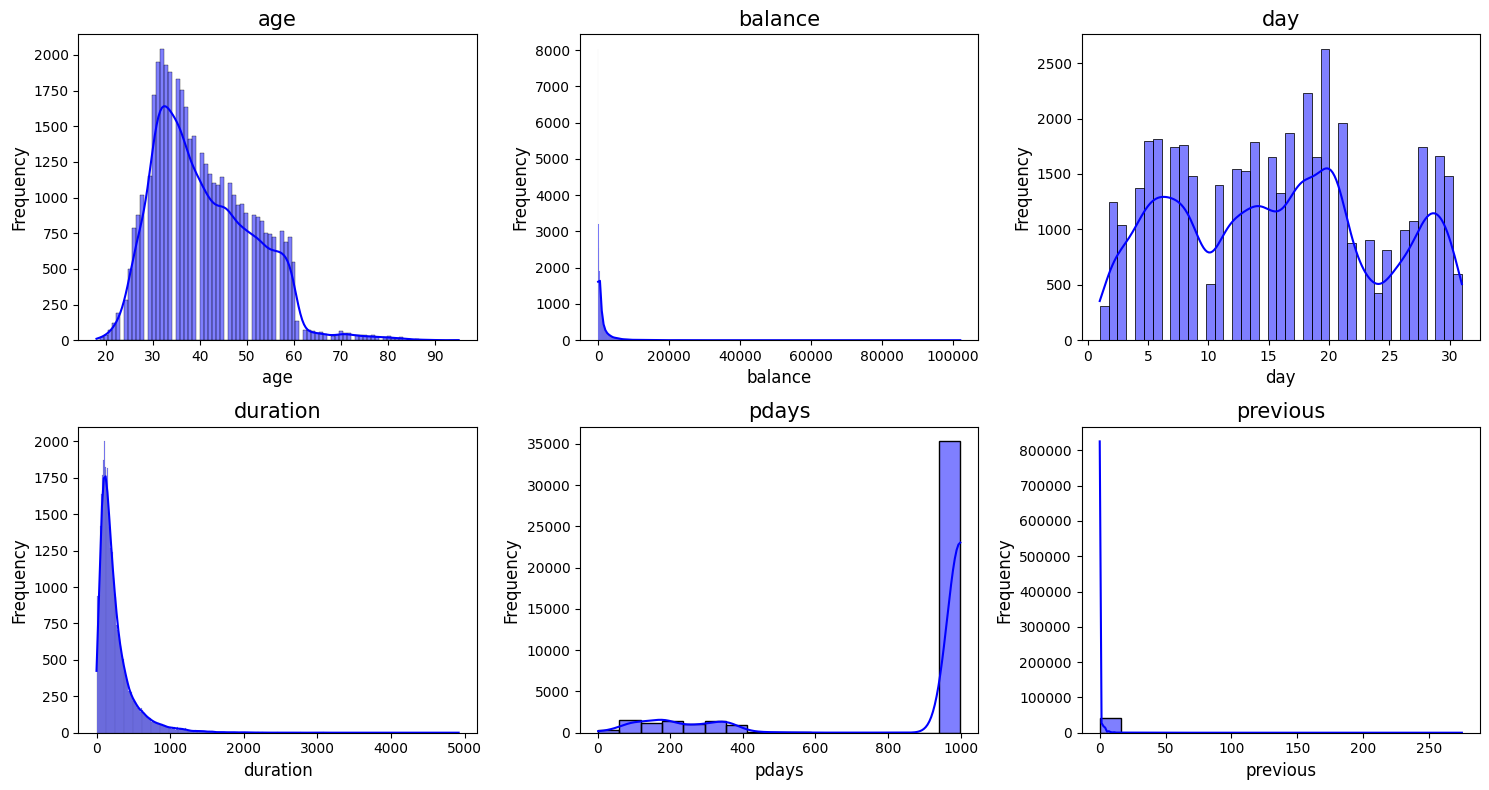

In [ ]:
# Import the matplotlib.pyplot module
import matplotlib.pyplot as plt

# Import the seaborn module
import seaborn as sns

# Plot histogram untuk kolom numerik
plt.figure(figsize=(15, 8))
num_cols = len(nums.columns)
for i, col in enumerate(nums.columns):
    plt.subplot(2, (num_cols + 1) // 2, i + 1)
    sns.histplot(nums[col], kde=True, color='blue') # Now sns is defined and can be used
    plt.title(col, fontsize=15)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

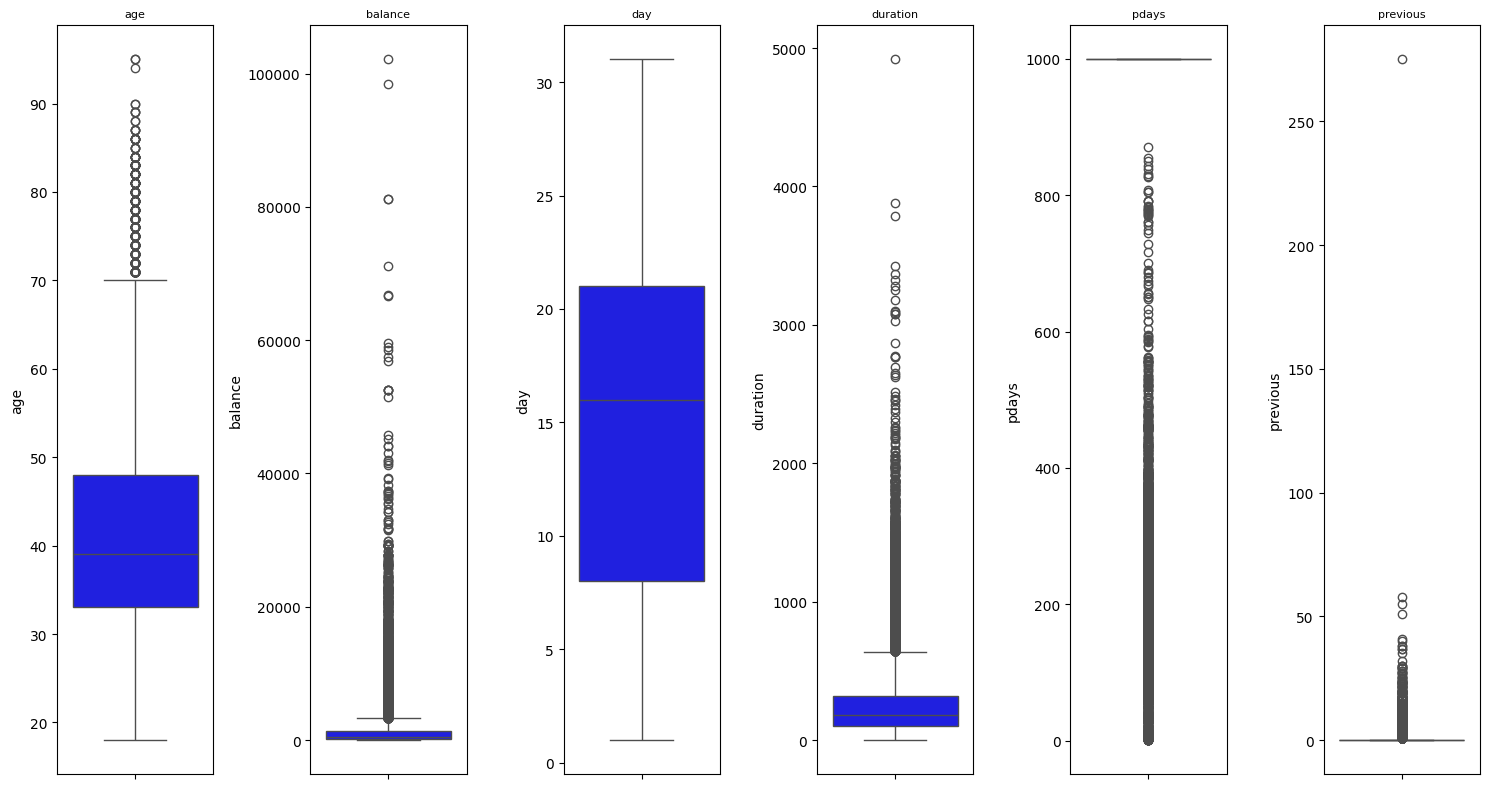

In [ ]:
# Plot boxplot untuk kolom numerik
plt.figure(figsize=(15, 8))
for i, col in enumerate(nums.columns):
    plt.subplot(1, len(nums.columns), i + 1)
    sns.boxplot(y=nums[col], color='blue', orient='v')
    plt.title(col, fontsize=8)
    plt.tight_layout()

plt.show()

**Analisis Grafik Distribusi Variabel Numerik**


1. **Age (Usia):**
   - **Skew:** Distribusi usia cenderung *right-skewed* (miring ke kanan). Artinya, sebagian besar nasabah berada pada rentang usia yang lebih muda, dengan sedikit sekali nasabah yang berusia sangat tua. Ini adalah pola yang umum ditemukan dalam data demografis.

2. **Balance (Saldo):**
   - **Skew:** Distribusi saldo juga *right-skewed*. Ini menunjukkan bahwa sebagian besar nasabah memiliki saldo yang relatif rendah, sementara hanya sedikit nasabah yang memiliki saldo yang sangat tinggi. Ini mungkin mencerminkan distribusi kekayaan yang umum di masyarakat.

3. **Day (Hari):**
   - **Pola:** Distribusi hari ini tidak menunjukkan skewness yang jelas. Sebaliknya, terlihat adanya beberapa *peaks* (puncak) yang mungkin mengindikasikan adanya pola musiman atau siklus tertentu dalam aktivitas nasabah. Misalnya, bisa jadi ada hari-hari tertentu dalam sebulan di mana aktivitas transaksi lebih tinggi daripada hari lainnya.

4. **Duration (Durasi):**
   - **Skew:** Distribusi durasi sangat *right-skewed*. Ini menunjukkan bahwa sebagian besar interaksi dengan nasabah memiliki durasi yang relatif singkat, sementara hanya sedikit interaksi yang berdurasi sangat panjang. Ini mungkin mencerminkan efisiensi dalam proses pelayanan atau karakteristik produk yang ditawarkan.

5. **Pdays (Hari sejak kontak terakhir):**
   - **Skew:** Distribusi pdays juga *right-skewed*. Ini mengindikasikan bahwa banyak nasabah belum pernah dihubungi sebelumnya (nilai pdays sangat tinggi), sementara hanya sedikit nasabah yang dihubungi secara berkala. Ini bisa menjadi petunjuk tentang frekuensi kampanye pemasaran.

6. **Previous (Kontak sebelumnya):**
   - **Skew:** Distribusi previous sangat *right-skewed*. Ini menunjukkan bahwa sebagian besar nasabah belum pernah dihubungi sebelumnya (nilai previous sama dengan 0), sementara hanya sedikit nasabah yang telah dihubungi beberapa kali. Ini konsisten dengan interpretasi dari variabel pdays.

**Implikasi:**

* **Transformasi Data:** Jika ingin melakukan analisis lebih lanjut, seperti regresi atau clustering, mungkin perlu dilakukan transformasi data untuk mengatasi masalah skewness. Transformasi yang umum digunakan adalah logaritma atau square root.

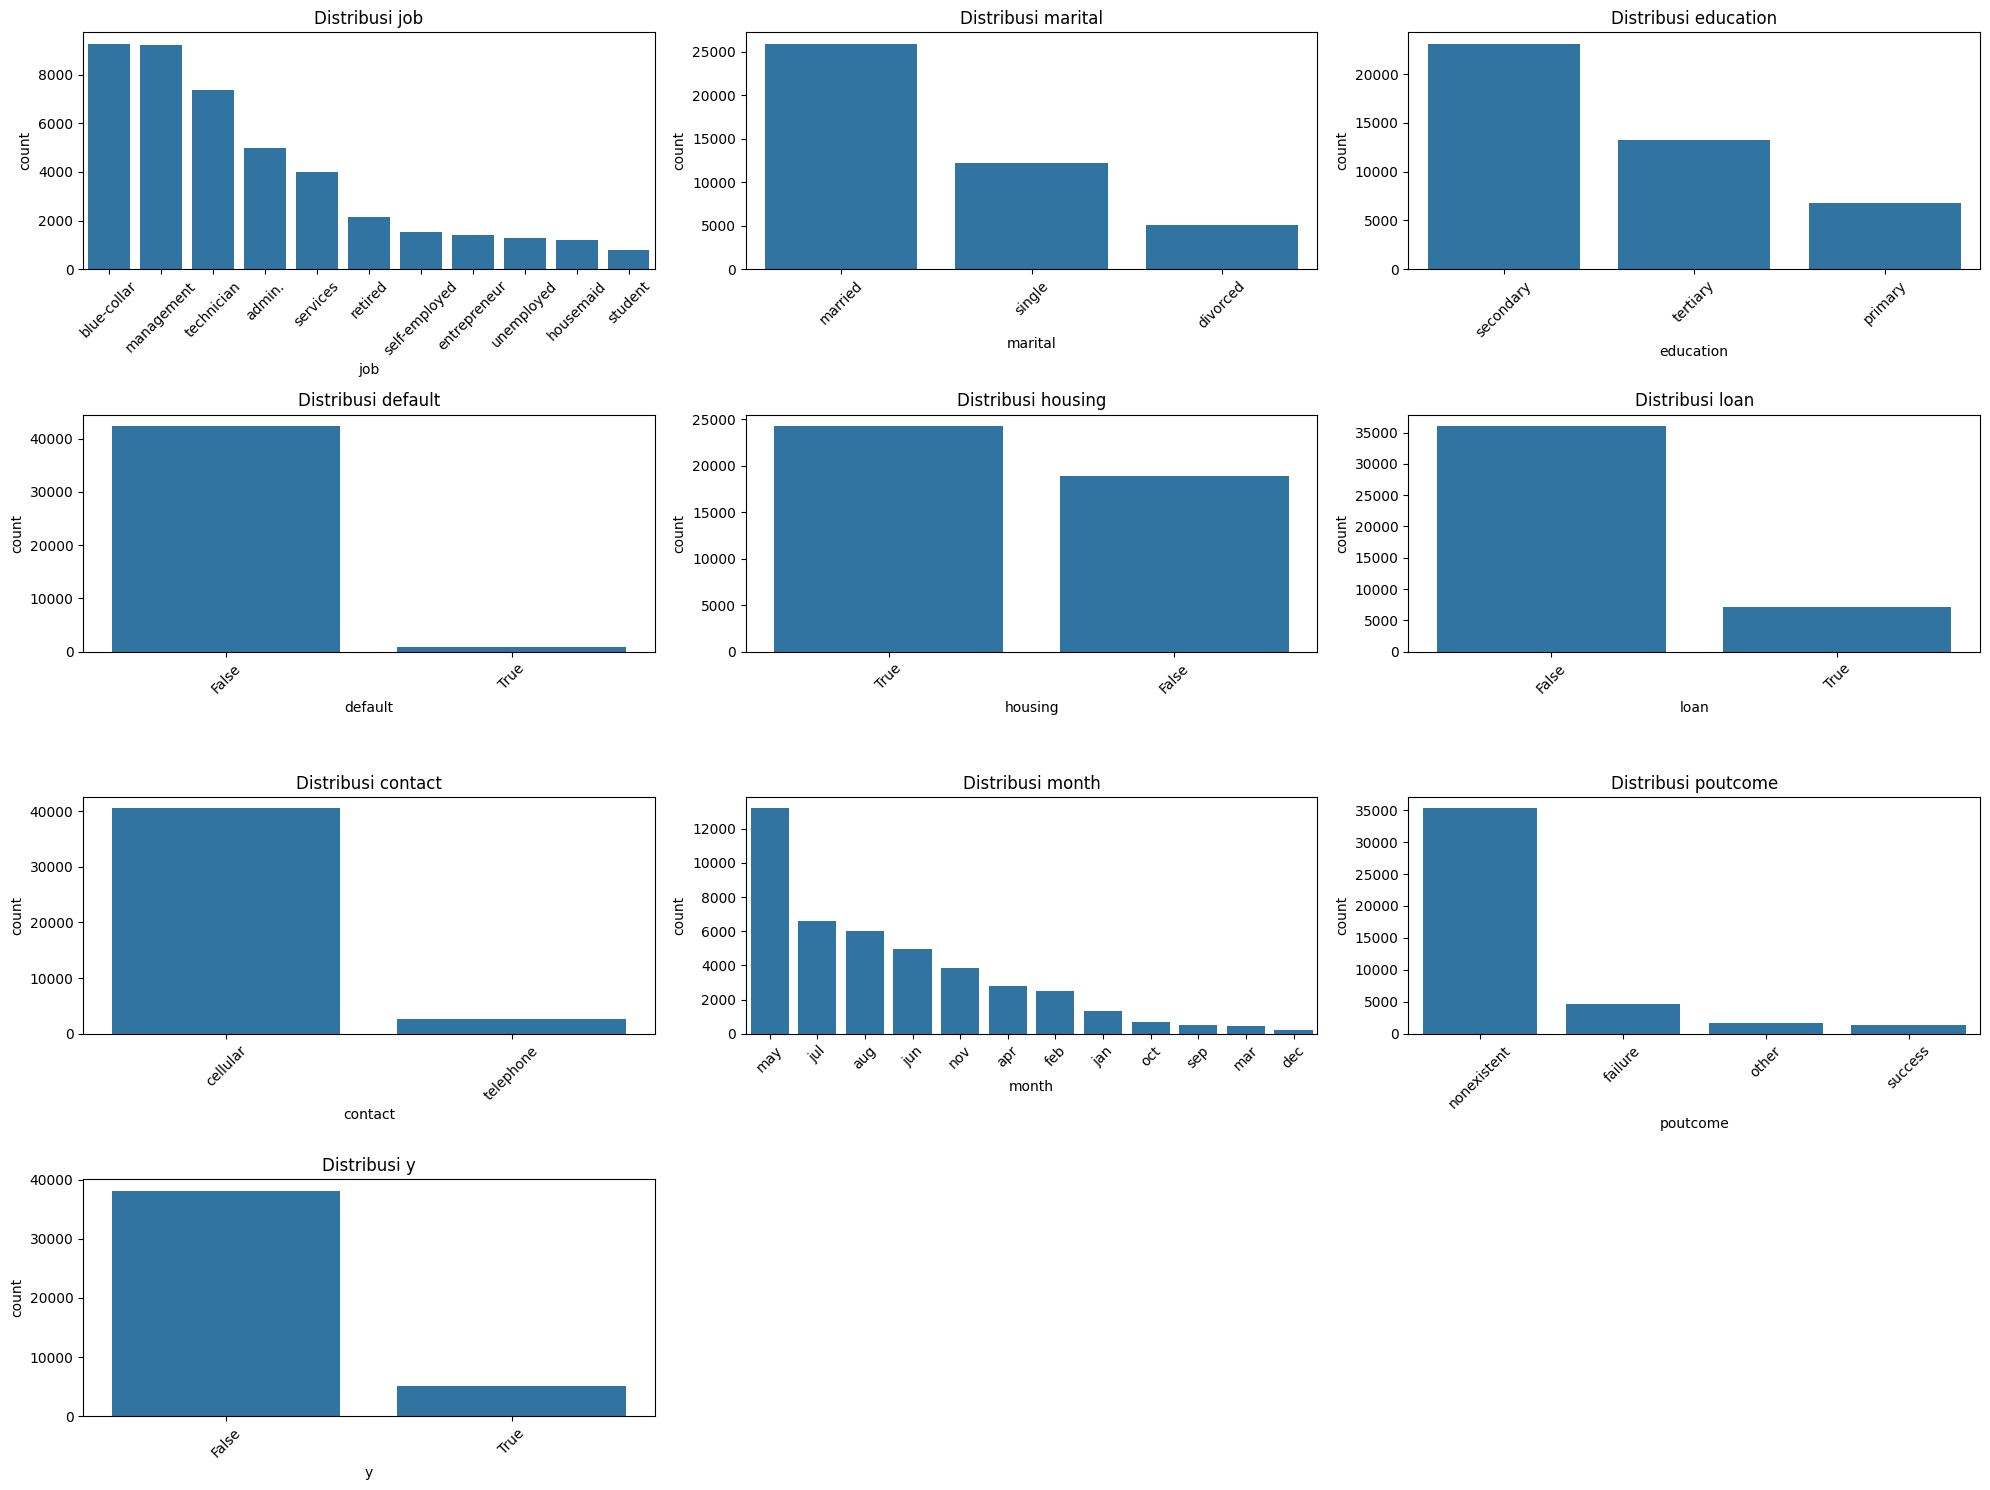

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi untuk kolom kategorikal
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

plt.figure(figsize=(20, 15))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)  # Hilangkan parameter palette
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Analisis Kolom Kategorikal Berdasarkan Visualisasi**

**Analisis Umum**

* **Dominasi Beberapa Kategori:** Terlihat jelas bahwa beberapa kategori dalam setiap kolom memiliki frekuensi yang jauh lebih tinggi dibandingkan kategori lainnya. Ini mengindikasikan adanya ketidakseimbangan kelas (class imbalance) dalam data.
* **Variasi Distribusi:** Distribusi frekuensi antar kolom sangat bervariasi. Beberapa kolom memiliki distribusi yang sangat condong ke satu kategori, sementara kolom lainnya memiliki distribusi yang lebih merata.

**Analisis Per Kolom (Berdasarkan Asumsi Bahasa Indonesia)**

* **job:** Sebagian besar nasabah memiliki pekerjaan sebagai 'management' atau 'technician'. Pekerjaan seperti 'housemaid', 'student', dan 'retired' memiliki frekuensi yang jauh lebih rendah.
* **marital:** Sebagian besar nasabah berstatus 'married', diikuti oleh 'single'. Status 'divorced' memiliki frekuensi yang jauh lebih sedikit.
* **education:** Sebagian besar nasabah memiliki tingkat pendidikan 'secondary'. Tingkat pendidikan 'tertiary' juga cukup signifikan, sedangkan tingkat pendidikan 'primary' lebih sedikit.
* **default:** Sebagian besar nasabah tidak memiliki default (nilai 'no'). Hanya sedikit nasabah yang memiliki riwayat default.
* **housing:** Sebagian besar nasabah memiliki pinjaman rumah (nilai 'yes').
* **loan:** Sebagian besar nasabah tidak memiliki pinjaman pribadi (nilai 'no').
* **contact:** Sebagian besar kontak dilakukan melalui 'cellular'. Kontak melalui 'telephone' jauh lebih sedikit.
* **month:** Sebagian besar kontak dilakukan pada bulan 'may' dan 'jul'. Bulan-bulan lainnya memiliki frekuensi yang lebih rendah.
* **poutcome:** Sebagian besar hasil kampanye sebelumnya adalah 'failure'. Hasil 'success' memiliki frekuensi yang paling rendah. nonexsistence artinya belum dihubungi.
* **y:** Sebagian besar nasabah tidak berlangganan produk (nilai 'no').

**Implikasi untuk Analisis Lebih Lanjut**

* **Pemodelan:** Kolom-kolom kategorikal ini dapat digunakan sebagai fitur dalam model machine learning untuk memprediksi variabel target (misalnya, 'y'). Namun, perlu dilakukan encoding (misalnya, one-hot encoding) sebelum digunakan dalam model.


## Multivariate Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43193 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        43193 non-null  int64 
 1   job        43193 non-null  object
 2   marital    43193 non-null  object
 3   education  43193 non-null  object
 4   default    43193 non-null  bool  
 5   balance    43193 non-null  int64 
 6   housing    43193 non-null  bool  
 7   loan       43193 non-null  bool  
 8   contact    43193 non-null  object
 9   day        43193 non-null  int64 
 10  month      43193 non-null  object
 11  duration   43193 non-null  int64 
 12  campaign   43193 non-null  object
 13  pdays      43193 non-null  int64 
 14  previous   43193 non-null  int64 
 15  poutcome   43193 non-null  object
 16  y          43193 non-null  bool  
dtypes: bool(4), int64(6), object(7)
memory usage: 4.8+ MB


## **Age >< y**

**Analisa Eksperimen yang digunakan**
1. Formulasi Hipotesis
Hipotesis Nol (H0): Tidak ada perbedaan signifikan dalam usia antara kategori y yang berbeda.
Hipotesis Alternatif (H1): Ada perbedaan signifikan dalam usia antara kategori y yang berbeda.
2. Pilih Metode Uji Statistik
Karena age adalah numerik dan y adalah boolean, kita bisa menggunakan:

3. Uji t untuk Dua Sampel Independen: Untuk menguji apakah rata-rata usia berbeda antara dua kategori y (True dan False).

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Pisahkan usia berdasarkan kategori y
age_y_true = df[df['y'] == 1]['age']
age_y_false = df[df['y'] == 0]['age']

# 1. Uji T untuk Dua Sampel Independen
t_stat, p_val = stats.ttest_ind(age_y_true, age_y_false, equal_var=False)

# Tampilkan hasil uji t
print(f'Uji T untuk usia dan y:')
print(f'T-statistic: {t_stat:.4f}')
print(f'P-value: {p_val:.4f}')

# Interpretasi hasil
alpha = 0.05
if p_val < alpha:
    print('Hasil: Tolak H0. Ada perbedaan signifikan dalam usia antara kategori y yang berbeda.')
else:
    print('Hasil: Gagal menolak H0. Tidak ada perbedaan signifikan dalam usia antara kategori y yang berbeda.')


Uji T untuk usia dan y:
T-statistic: 4.1684
P-value: 0.0000
Hasil: Tolak H0. Ada perbedaan signifikan dalam usia antara kategori y yang berbeda.


In [ ]:
import numpy as np

# Hitung rata-rata dan deviasi standar
mean_true = np.mean(age_y_true)
mean_false = np.mean(age_y_false)
std_true = np.std(age_y_true, ddof=1)
std_false = np.std(age_y_false, ddof=1)

# Hitung ukuran efek Cohen's d
pooled_std = np.sqrt(((std_true**2 + std_false**2) / 2))
cohen_d = (mean_true - mean_false) / pooled_std

print(f'Cohen\'s d: {cohen_d:.4f}')


Cohen's d: 0.0688


Kesimpulan
Secara keseluruhan:

Ada perbedaan signifikan dalam usia antara kategori y, tetapi perbedaan ini kecil dalam konteks praktis.
Cohen's d yang kecil menunjukkan bahwa meskipun ada perbedaan statistik yang signifikan, pengaruh usia terhadap kategori y tidak besar secara praktis. Ini berarti faktor usia mungkin bukan faktor yang sangat kuat dalam memprediksi atau menjelaskan variasi dalam y, meskipun perbedaan usia dapat diidentifikasi secara statistik.

## **job >< y**

Untuk menguji hubungan antara variabel kategorikal seperti job dan variabel target kategorikal seperti y, kita bisa menggunakan beberapa metode statistik yang sesuai. Dalam kasus ini, kita dapat menggunakan uji Chi-Square untuk menguji independensi antara job dan y, serta menghitung ukuran efek seperti Cramér's V untuk mengetahui seberapa besar pengaruhnya.

Hipotesis
Hipotesis Nol (H0):
Tidak ada hubungan antara job dan y. Artinya, distribusi frekuensi kategori job adalah sama untuk kategori y yang berbeda.

Hipotesis Alternatif (H1):
Ada hubungan antara job dan y. Artinya, distribusi frekuensi kategori job berbeda untuk kategori y yang berbeda.

Langkah-langkah Analisis
Uji Chi-Square:

- Menguji apakah terdapat hubungan yang signifikan antara job dan y.
Cramér's V:

- Mengukur kekuatan asosiasi antara dua variabel kategorikal.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Menghitung tabel kontingensi antara 'job' dan 'y'
contingency_table = pd.crosstab(df['job'], df['y'])

# Melakukan uji Chi-Square
chi2_stat, p_value, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")


Chi-Square Statistic: 772.4886316546689
P-value: 1.690329500153999e-159


In [ ]:
import numpy as np

# Menghitung ukuran efek Cramér's V
n = contingency_table.sum().sum()
phi2 = chi2_stat / n
r, k = contingency_table.shape
phi2_corr = max(0, phi2 - (k - 1) / (n - 1))
r_corr = r - (r - 1) * (k - 1) / (n - 1)
k_corr = k - (r - 1) * (k - 1) / (n - 1)
cramers_v = np.sqrt(phi2_corr / min(r_corr, k_corr))

print(f"Cramér's V: {cramers_v}")


Cramér's V: 0.0945079222445329


Berikut adalah interpretasi dari hasil uji Chi-Square dan Cramér's V untuk variabel `job` dan `y`:

### Hasil Uji Chi-Square

- **Chi-Square Statistic:** 772.49
- **P-value:** 1.69e-159

#### Interpretasi:

- **P-value** sangat kecil (jauh di bawah 0.05), yang berarti kita **menolak hipotesis nol (H0)**. Ini menunjukkan bahwa ada hubungan yang signifikan antara variabel `job` dan `y`. Dengan kata lain, distribusi frekuensi kategori `job` berbeda untuk kategori `y` yang berbeda.

### Cramér's V

- **Cramér's V:** 0.0945

#### Interpretasi:

- **Cramér's V** mengukur kekuatan asosiasi antara variabel `job` dan `y`. Nilai Cramér's V berkisar antara 0 (tidak ada asosiasi) hingga 1 (asosiasi sempurna). Nilai 0.0945 menunjukkan adanya asosiasi **yang lemah** antara `job` dan `y`.

### Kesimpulan

- **Ada hubungan signifikan** antara `job` dan `y`, tetapi **kekuatan asosiasi tersebut lemah**. Ini berarti meskipun ada perbedaan yang signifikan dalam distribusi `job` antara kategori `y`, perbedaan ini tidak terlalu besar dan mungkin tidak memiliki dampak praktis yang besar.


## **loan >< y**

Hipotesis
Hipotesis Nol (H0): Tidak ada hubungan signifikan antara loan dan y. (Koefisien korelasi atau koefisien regresi = 0).

Hipotesis Alternatif (H1): Ada hubungan signifikan antara loan dan y. (Koefisien korelasi atau koefisien regresi ≠ 0).

Metode yang Digunakan
Korelasi Pearson untuk mengukur kekuatan dan arah hubungan linear antara loan (variabel numerik) dan y (variabel boolean yang dikonversi ke numerik).

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Konversi y ke numerik (0 dan 1)
df['y_numeric'] = df['y'].astype(int)

# Hitung korelasi Pearson
corr, p_value = pearsonr(df['loan'], df['y_numeric'])

# Tampilkan hasil
print(f'Koefisien Korelasi Pearson: {corr:.4f}')
print(f'P-value: {p_value:.4f}')


Koefisien Korelasi Pearson: -0.0688
P-value: 0.0000


Kesimpulan
Secara Statistik: Hubungan antara loan dan y signifikan secara statistik karena p-value sangat kecil.
Secara Praktis: Hubungan tersebut sangat lemah, yang berarti bahwa meskipun ada hubungan statistik yang signifikan, pengaruh praktis dari loan terhadap y sangat kecil.

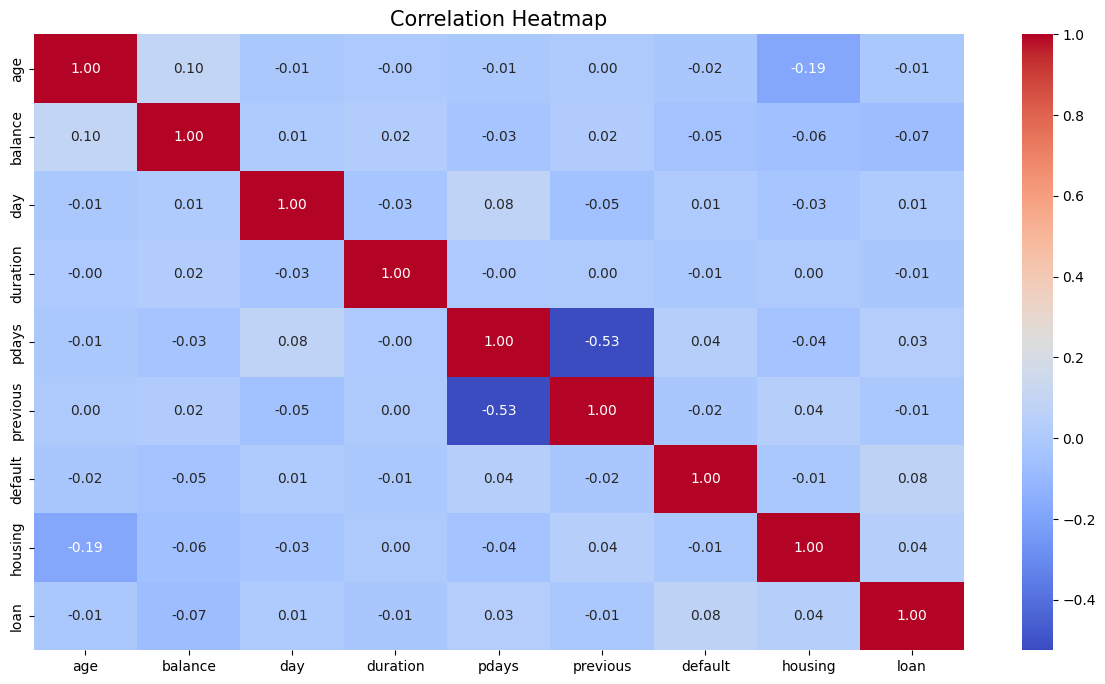

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Konversi kolom boolean ke numerik
bool_to_numeric = df[['default', 'housing', 'loan']].astype(int)

# Gabungkan dengan kolom numerik yang sudah ada
nums = pd.concat([df[['age', 'balance', 'day', 'duration', 'pdays', 'previous']], bool_to_numeric], axis=1)

# Hitung matriks korelasi
corr = nums.corr()

# Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=15)
plt.show()




*Eksperimen saat ini telah mencakup analisis dasar dari dataset, namun pola yang muncul menunjukkan bahwa tidak ada hubungan yang sangat kuat antara fitur-fitur yang ada dengan target yang dianalisis. Untuk langkah selanjutnya, kami berencana untuk menambahkan data eksternal guna memperoleh wawasan yang lebih mendalam. Berdasarkan referensi dari penelitian ilmiah, terdapat fitur-fitur eksternal yang memiliki pengaruh signifikan terhadap target, seperti kondisi ekonomi pada periode tertentu.*

*Sebagai contoh, antara tahun 2008 hingga 2012, Portugal mengalami krisis ekonomi yang dipengaruhi oleh faktor-faktor seperti perubahan dalam sektor energi terbarukan. Karena dataset ini mencerminkan situasi nyata, sangat penting untuk memasukkan data eksternal yang relevan untuk analisis yang lebih komprehensif. Langkah ini akan menjadi fokus pada tahap berikutnya, mengingat keterbatasan waktu saat ini.*


# **Handling Outliers**

Untuk penanganan outliers dalam analisis data, Anda dapat menggunakan metode Winsorizing. Berikut penjelasan tentang metode ini dan alasannya:

### **Penjelasan Metode Winsorizing**

Winsorizing adalah teknik pra-pemrosesan data yang mengatasi nilai-nilai ekstrem atau outliers dengan menggantinya dengan nilai yang berada pada batas tertentu. Alih-alih menghapus data outlier, Winsorizing mengubah nilai-nilai ekstrem ke nilai batas yang telah ditentukan. Metode ini sering digunakan untuk mengurangi dampak outliers pada analisis statistik dan model prediksi.

### **Langkah-langkah Winsorizing**

1. **Tentukan Batas Bawah dan Atas**:
   - Untuk mengidentifikasi batas bawah dan atas, Winsorizing biasanya menggunakan persentil atau quartile. Misalnya, batas dapat ditentukan sebagai persentil ke-1 dan ke-99 atau berdasarkan quartile dengan rentang interquartile (IQR).
   - Sebagai contoh, menggunakan quartile, batas bawah adalah Q1 - 1.5*IQR dan batas atas adalah Q3 + 1.5*IQR.

2. **Terapkan Batas pada Data**:
   - Ganti nilai-nilai yang berada di bawah batas bawah dengan nilai batas bawah.
   - Ganti nilai-nilai yang berada di atas batas atas dengan nilai batas atas.

### **Alasan Menggunakan Winsorizing**

1. **Mengurangi Dampak Outliers**:
   - Outliers dapat mendistorsi hasil analisis statistik dan model prediksi. Dengan mengubah nilai-nilai ekstrem ke batas yang lebih wajar, Winsorizing membantu mengurangi efek dari outliers tanpa menghapus data yang mungkin berharga.

2. **Mempertahankan Data**:
   - Winsorizing mempertahankan semua data asli, tetapi mengatur ulang nilai-nilai ekstrem. Ini memastikan bahwa informasi yang mungkin berguna dalam data tetap ada, sementara nilai ekstrem tidak memengaruhi hasil analisis secara berlebihan.

3. **Meningkatkan Stabilitas Analisis**:
   - Dengan membatasi nilai-nilai ekstrem, distribusi data menjadi lebih stabil dan mendekati distribusi normal. Ini membuat teknik statistik dan model prediksi lebih efektif dan menghasilkan hasil yang lebih dapat diandalkan.

4. **Kesesuaian untuk Model Statistik**:
   - Banyak model statistik dan machine learning lebih sensitif terhadap data yang sangat miring atau memiliki outliers ekstrem. Winsorizing membantu dalam memastikan bahwa model tersebut bekerja lebih baik dengan data yang telah distabilkan.


In [ ]:
import pandas as pd

# Menentukan kolom numerik
numeric_cols = ['age', 'balance', 'duration', 'pdays', 'previous']

# Menghitung batas atas dan bawah berdasarkan IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)


## **Feature transformation**


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Kolom numerik untuk Min-Max Scaling
numeric_cols = ['age', 'balance', 'duration', 'pdays', 'previous']

# Statistik deskriptif sebelum scaling
print("Statistik Deskriptif Sebelum Min-Max Scaling:")
print(df[numeric_cols].describe())

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Terapkan Min-Max Scaling
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Statistik deskriptif setelah scaling
print("\nStatistik Deskriptif Setelah Min-Max Scaling:")
print(df_scaled[numeric_cols].describe())


Statistik Deskriptif Sebelum Min-Max Scaling:
                age       balance      duration    pdays  previous
count  43193.000000  43193.000000  43193.000000  43193.0   43193.0
mean      40.701665    970.472634    234.770379    999.0       0.0
std       10.304865   1106.811398    176.234987      0.0       0.0
min       18.000000      1.000000      0.000000    999.0       0.0
25%       33.000000    137.000000    103.000000    999.0       0.0
50%       39.000000    482.000000    180.000000    999.0       0.0
75%       48.000000   1424.000000    318.000000    999.0       0.0
max       70.500000   3354.500000    640.500000    999.0       0.0

Statistik Deskriptif Setelah Min-Max Scaling:
                age       balance      duration    pdays  previous
count  43193.000000  43193.000000  43193.000000  43193.0   43193.0
mean       0.432413      0.289093      0.366542      0.0       0.0
std        0.196283      0.330047      0.275152      0.0       0.0
min        0.000000      0.000000   

Dari statistik deskriptif sebelum dan setelah Min-Max Scaling, kita bisa melihat beberapa perubahan signifikan yang mengindikasikan efek dari scaling pada data:

### **Statistik Deskriptif Sebelum Scaling**
- **`age`**: Nilai minimum dan maksimum cukup luas (-1.4 hingga 2.1) dan data tidak memiliki batasan tertentu.
- **`balance`**: Juga memiliki rentang nilai yang besar (-0.37 hingga 2.23).
- **`duration`**: Rentang nilai yang luas (-0.84 hingga 2.14).
- **`pdays` dan `previous`**: Hanya memiliki nilai 0 atau nilai kecil lainnya, tidak banyak variasi.

### **Statistik Deskriptif Setelah Scaling**
- **`age`**: Rentang nilai menjadi 0 hingga 1 dengan mean di 0.43, dan distribusi nilai yang lebih kompak.
- **`balance`**: Rentang nilai menjadi 0 hingga 1, mean di 0.29, distribusi nilai menjadi lebih teratur.
- **`duration`**: Rentang nilai 0 hingga 1 dengan mean di 0.37.
- **`pdays` dan `previous`**: Masih memiliki nilai 0 saja, tidak ada perubahan signifikan di sini karena mereka mungkin sudah memiliki nilai yang terbatas.

### **Analisis Efek Scaling**

1. **Rentang Nilai**:
   - Setelah Min-Max Scaling, rentang nilai setiap kolom menjadi 0 hingga 1. Ini memudahkan perbandingan antar kolom dan mempersiapkan data untuk teknik yang sensitif terhadap skala, seperti algoritma machine learning.

2. **Mean dan Standar Deviasi**:
   - Mean dan standar deviasi kolom numerik setelah scaling lebih terkontrol dan berada dalam rentang yang konsisten. Ini membantu memastikan bahwa semua fitur memiliki pengaruh yang sebanding dalam model.

3. **Distribusi Data**:
   - Setelah scaling, distribusi data menjadi lebih seragam dan dalam rentang yang terbatas. Ini dapat meningkatkan performa beberapa algoritma machine learning yang sensitif terhadap skala fitur.

4. **Kolom `pdays` dan `previous`**:
   - Kedua kolom ini tetap memiliki nilai 0 setelah scaling, menunjukkan bahwa mereka mungkin tidak memberikan banyak informasi atau variasi yang berguna setelah scaling.

### **Kesimpulan**

Min-Max Scaling telah mengubah data Anda dari rentang nilai yang luas ke rentang yang lebih kompak (0 hingga 1). Ini adalah langkah penting untuk memastikan bahwa semua fitur berkontribusi secara seimbang dalam model analisis atau machine learning yang Anda gunakan. Perubahan ini seharusnya membantu dalam meningkatkan performa model dan konsistensi hasil analisis.




*Dalam proses pra-pemrosesan data kali ini, telah dilakukan penghapusan outliers menggunakan metode Winsorizing. Setelah proses tersebut, beberapa kolom dalam dataset menunjukkan distribusi yang mendekati distribusi normal, meskipun tidak sepenuhnya sempurna dan masih terdapat kecenderungan right skew. Dalam konteks ini, normalisasi diterapkan untuk memastikan bahwa semua fitur berada dalam rentang yang konsisten, yaitu [0, 1], yang merupakan langkah penting untuk model yang sensitif terhadap skala fitur.*

**Alasan untuk Normalisasi:**
1. **Konsistensi Skala Fitur:** Normalisasi mengubah skala data sehingga semua fitur berada dalam rentang yang seragam, yaitu [0, 1]. Ini membantu model machine learning berfungsi dengan lebih baik karena fitur-fitur yang berada pada skala yang berbeda dapat mempengaruhi kinerja model secara tidak proporsional.

2. **Pengaruh Outliers:** Meskipun Winsorizing telah mengurangi dampak outliers, normalisasi membantu mengatasi perbedaan skala yang mungkin masih ada setelah proses tersebut. Ini penting untuk algoritma yang sensitif terhadap skala, seperti gradient descent-based methods.

3. **Kemudahan dalam Model Training:** Model-model seperti regresi logistik, SVM, dan neural networks lebih efektif ketika data berada dalam rentang yang sama. Normalisasi membantu mempercepat konvergensi dan meningkatkan kinerja model.

*Namun, jika di kemudian hari ditemukan bahwa model yang digunakan memerlukan data dengan distribusi yang lebih mendekati distribusi normal untuk hasil yang lebih optimal, proses transformasi akan diterapkan. Teknik transformasi seperti logaritma atau transformasi lainnya akan digunakan untuk mengatasi distribusi miring yang tersisa dan meningkatkan kesesuaian data dengan asumsi model.*

**Rencana Iteratif:**
- **Evaluasi Berkala:** Proses akan melibatkan evaluasi berkala untuk menentukan apakah distribusi data memerlukan penyesuaian lebih lanjut.
- **Transformasi:** Jika analisis atau performa model menunjukkan perlunya distribusi yang lebih normal, transformasi tambahan akan diterapkan. Misalnya, transformasi logaritma dapat digunakan untuk mengurangi skewness.

Dengan pendekatan ini, iterasi berulang dilakukan untuk memastikan bahwa data dipersiapkan dengan cara yang paling sesuai dengan kebutuhan model dan analisis yang dilakukan.



## **Feature encoding**



Dalam proses encoding fitur untuk model machine learning, penting untuk memilih metode encoding yang tepat berdasarkan jenis data dan fitur. Berikut adalah analisis untuk fitur-fitur dalam dataset Anda:

### **One-Hot Encoding**

**One-hot encoding** cocok untuk variabel kategorikal nominal yang tidak memiliki urutan atau hubungan ordinal antara nilai-nilainya. Setiap kategori diubah menjadi kolom biner terpisah.

Fitur-fitur yang cocok untuk **one-hot encoding** dalam dataset Anda:

1. **`job`**: Memiliki 11 kategori berbeda. One-hot encoding akan menciptakan 11 kolom baru, satu untuk setiap kategori. Meskipun `job` memiliki banyak nilai unik, untuk saat ini kita akan menerapkan one-hot encoding. Namun, akan dilakukan analisis lebih lanjut untuk mengevaluasi dampak dimensionalitas tinggi yang mungkin timbul dan menentukan apakah metode encoding alternatif seperti target encoding atau embedding lebih sesuai.

2. **`marital`**: Memiliki 3 kategori ('married', 'single', 'divorced'). One-hot encoding akan menciptakan 3 kolom baru.

3. **`education`**: Memiliki 3 kategori ('tertiary', 'secondary', 'primary'). One-hot encoding akan menciptakan 3 kolom baru.

4. **`contact`**: Memiliki 2 kategori ('cellular', 'telephone'). One-hot encoding akan menciptakan 2 kolom baru.

5. **`poutcome`**: Memiliki 4 kategori ('nonexistent', 'failure', 'other', 'success'). One-hot encoding akan menciptakan 4 kolom baru.

### **Label Encoding**

**Label encoding** cocok untuk variabel kategorikal ordinal di mana ada urutan antara kategori. Label encoding mengubah kategori menjadi angka integer. Juga bisa digunakan untuk variabel biner.

Fitur-fitur yang lebih cocok untuk **label encoding** atau **langsung digunakan**:

1. **`default`**: Variabel biner dengan nilai True/False. Label encoding dapat mengubah ini menjadi 1/0 atau Anda bisa menggunakan langsung dalam model yang mendukung fitur biner.

2. **`housing`**: Variabel biner dengan nilai True/False. Label encoding dapat mengubah ini menjadi 1/0 atau langsung digunakan.

3. **`loan`**: Variabel biner dengan nilai True/False. Label encoding dapat mengubah ini menjadi 1/0 atau langsung digunakan.

4. **`y`**: Variabel target biner dengan nilai True/False. Label encoding atau konversi ke 1/0 sudah dilakukan dengan kolom `y_numeric`, sehingga bisa langsung digunakan.

### **Ringkasan**

- **One-Hot Encoding**: `job`, `marital`,, `contact`, `poutcome`.
- **Label Encoding atau Langsung Digunakan**: `default`, `housing`, `loan`,  `education`.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43193 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        43193 non-null  float64
 1   job        43193 non-null  object 
 2   marital    43193 non-null  object 
 3   education  43193 non-null  object 
 4   default    43193 non-null  bool   
 5   balance    43193 non-null  float64
 6   housing    43193 non-null  bool   
 7   loan       43193 non-null  bool   
 8   contact    43193 non-null  object 
 9   day        43193 non-null  int64  
 10  month      43193 non-null  object 
 11  duration   43193 non-null  float64
 12  campaign   43193 non-null  object 
 13  pdays      43193 non-null  int64  
 14  previous   43193 non-null  int64  
 15  poutcome   43193 non-null  object 
 16  y          43193 non-null  bool   
 17  y_numeric  43193 non-null  int64  
dtypes: bool(4), float64(3), int64(4), object(7)
memory usage: 5.1+ MB


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding untuk kolom-kolom yang sesuai
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'contact', 'poutcome'])

# Label Encoding untuk kolom biner
label_encoder = LabelEncoder()
df_encoded['default'] = label_encoder.fit_transform(df['default'])
df_encoded['housing'] = label_encoder.fit_transform(df['housing'])
df_encoded['loan'] = label_encoder.fit_transform(df['loan'])

# Label Encoding untuk kolom 'month' sesuai urutan bulan
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
df_encoded['month'] = df['month'].cat.codes

# Label Encoding untuk kolom 'education' sesuai urutan yang diberikan
education_order = ['primary', 'secondary', 'tertiary']
df['education'] = pd.Categorical(df['education'], categories=education_order, ordered=True)
df_encoded['education'] = df['education'].cat.codes

# Menghapus kolom 'education' dari one-hot encoding
df_encoded.drop(columns=['education'], inplace=True)

# Memastikan hanya satu kolom 'y' yang dipertahankan dan dalam bentuk biner (1 dan 0)
df_encoded = df_encoded.drop(columns=['y_numeric'], errors='ignore')

# Pastikan y adalah tipe data integer atau boolean
df_encoded['y'] = df_encoded['y'].astype(int)

# Tampilkan informasi DataFrame setelah encoding
print(df_encoded.info())


<class 'pandas.core.frame.DataFrame'>
Index: 43193 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   43193 non-null  float64
 1   default               43193 non-null  int64  
 2   balance               43193 non-null  float64
 3   housing               43193 non-null  int64  
 4   loan                  43193 non-null  int64  
 5   day                   43193 non-null  int64  
 6   month                 43193 non-null  int8   
 7   duration              43193 non-null  float64
 8   campaign              43193 non-null  object 
 9   pdays                 43193 non-null  int64  
 10  previous              43193 non-null  int64  
 11  y                     43193 non-null  int64  
 12  job_admin.            43193 non-null  bool   
 13  job_blue-collar       43193 non-null  bool   
 14  job_entrepreneur      43193 non-null  bool   
 15  job_housemaid         43

Pisahkan Fitur dan Target

In [ ]:
# Pisahkan fitur dan target dari df_encoded
X = df_encoded.drop(columns=['y'])
y = df_encoded['y']

# Tampilkan bentuk awal X dan y
print("Original shape of X:", X.shape)
print("Original shape of y:", y.shape)

# Tampilkan distribusi kelas awal
print("Original class distribution:\n", y.value_counts())


Original shape of X: (43193, 31)
Original shape of y: (43193,)
Original class distribution:
 y
0    38172
1     5021
Name: count, dtype: int64


## **Handle class imbalance**


In [ ]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk dataset train dan test
print("Train shape of X:", X_train.shape)
print("Train shape of y:", y_train.shape)
print("Test shape of X:", X_test.shape)
print("Test shape of y:", y_test.shape)


Train shape of X: (34554, 31)
Train shape of y: (34554,)
Test shape of X: (8639, 31)
Test shape of y: (8639,)


Sebelum menangani ketidakseimbangan kelas dalam data, penting untuk membagi dataset menjadi data pelatihan dan pengujian. Berikut adalah alasan mengapa ini dilakukan:

### Alasan Memisahkan Data Sebelum Menangani Ketidakseimbangan Kelas

1. **Menghindari Data Leakage**:
   - Jika ketidakseimbangan kelas ditangani sebelum pemisahan data, informasi dari data pengujian dapat bocor ke data pelatihan. Ini menyebabkan model terlihat berkinerja lebih baik pada data pengujian daripada yang sebenarnya karena telah melihat sebagian dari distribusi data pengujian selama pelatihan.

2. **Simulasi Kondisi Nyata**:
   - Dalam situasi dunia nyata, kita tidak akan memiliki akses ke data pengujian saat melakukan preprocessing pada data pelatihan. Memisahkan data terlebih dahulu memastikan bahwa kita mensimulasikan kondisi yang sama selama pelatihan dan evaluasi.

3. **Evaluasi yang Lebih Akurat**:
   - Dengan memisahkan data terlebih dahulu, kita dapat melakukan penanganan ketidakseimbangan kelas hanya pada data pelatihan. Ini memungkinkan kita untuk mengevaluasi model pada data pengujian yang belum terpengaruh oleh teknik resampling atau penyeimbangan kelas, memberikan gambaran yang lebih akurat tentang kinerja model.





In [ ]:
from imblearn.over_sampling import SMOTE

# Menerapkan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Menampilkan dimensi setelah SMOTE
print(f"Original train dataset shape: {X_train.shape, y_train.shape}")
print(f"Resampled train dataset shape: {X_train_smote.shape, y_train_smote.shape}")

# Menampilkan distribusi kelas setelah SMOTE
print('\nAfter SMOTE:')
print(pd.Series(y_train_smote).value_counts())


Original train dataset shape: ((34554, 31), (34554,))
Resampled train dataset shape: ((61028, 31), (61028,))

After SMOTE:
y
1    30514
0    30514
Name: count, dtype: int64


Menggunakan SMOTE (Synthetic Minority Over-sampling Technique) untuk menangani ketidakseimbangan kelas memiliki beberapa keuntungan penting dibandingkan metode lainnya seperti undersampling atau oversampling konvensional. Berikut adalah beberapa alasan kuat mengapa SMOTE sering kali lebih baik:

1. Meningkatkan Kinerja Model
- **Mengurangi Bias Kelas Mayoritas:** Dalam dataset yang tidak seimbang, model cenderung untuk memprediksi kelas mayoritas lebih sering. Dengan menyeimbangkan kelas menggunakan SMOTE, model dapat belajar untuk mengenali pola dalam data minoritas, sehingga meningkatkan akurasi prediksi untuk kedua kelas.
- **Mengurangi Overfitting:** Oversampling konvensional cenderung menduplikasi data minoritas, yang dapat menyebabkan overfitting karena model belajar dari data yang sama berulang kali. SMOTE, di sisi lain, menghasilkan contoh sintetis baru dari data minoritas, yang membantu dalam mengurangi risiko overfitting.

 2. Mempertahankan Informasi
- **Menghindari Kehilangan Informasi:** Undersampling kelas mayoritas dapat menghilangkan informasi penting karena banyak data mayoritas yang dibuang. Dengan SMOTE, semua data mayoritas tetap dipertahankan, dan contoh sintetis ditambahkan ke kelas minoritas, sehingga tidak ada informasi yang hilang dari kelas mayoritas.
- **Meningkatkan Variabilitas Data:** Contoh sintetis yang dihasilkan oleh SMOTE membantu dalam memperluas representasi data minoritas, yang dapat memberikan model lebih banyak informasi untuk dipelajari dan meningkatkan generalisasi model.






## **Feature Engineering**

Berikut adalah daftar lengkap fitur baru yang bisa diekstrak dari dataset yang ada.

### 1. **Binning**
   - **Age Group:**
     - Membagi kolom `age` menjadi beberapa kategori seperti `Youth` (<= 25), `Adult` (26-45), `Senior` (46-65), `Elderly` (65+).
     - **Alasan:** Mengelompokkan usia dapat membantu dalam analisis perilaku nasabah berdasarkan kelompok usia yang berbeda.

### 2. **Derived Features**
   - **Balance per Campaign:**
     - Membuat kolom baru `balance_per_campaign` = `balance` / (`campaign` + 1) (menambahkan 1 untuk menghindari pembagian dengan nol).
     - **Alasan:** Menilai seberapa besar saldo rata-rata per kampanye yang diikuti nasabah.

   - **Contact Duration per Day:**
     - Membuat kolom baru `duration_per_day` = `duration` / (`day` + 1) (menambahkan 1 untuk menghindari pembagian dengan nol).
     - **Alasan:** Mengukur durasi rata-rata kontak per hari.

### 3. **Interaction Features**
   - **Balance * Duration:**
     - Membuat kolom baru dari hasil perkalian `balance` dan `duration`.
     - **Alasan:** Menangkap efek gabungan antara saldo nasabah dan durasi kontak yang mungkin mempengaruhi hasil kampanye.

   - **Campaign * Previous:**
     - Membuat kolom baru dari hasil perkalian `campaign` dan `previous`.
     - **Alasan:** Mengukur seberapa sering nasabah dihubungi dalam kampanye sebelumnya.

### 4. **Temporal Features**
   - **Month to Quarter:**
     - Mengubah kolom `month` menjadi kuartal (`Q1`, `Q2`, `Q3`, `Q4`).
     - **Alasan:** Mengidentifikasi pola musiman dalam kampanye pemasaran.

### 5. **Aggregated Features**
   - **Total Contacts:**
     - Menjumlahkan kolom `campaign` dan `previous` menjadi kolom baru `total_contacts`.
     - **Alasan:** Mengukur total jumlah kontak yang diterima nasabah dalam semua kampanye.

   - **Average Balance per Education:**
     - Membuat kolom baru `avg_balance_education` yang menunjukkan rata-rata balance untuk setiap kategori pendidikan (`education`).
     - **Alasan:** Mengetahui bagaimana rata-rata saldo nasabah berbeda berdasarkan tingkat pendidikan mereka.

   - **Average Balance per Job:**
     - Membuat kolom baru `avg_balance_job` yang menunjukkan rata-rata balance untuk setiap kategori pekerjaan (`job`).
     - **Alasan:** Menilai perbedaan rata-rata saldo berdasarkan jenis pekerjaan nasabah.

   - **Average Balance per Marital Status:**
     - Membuat kolom baru `avg_balance_marital` yang menunjukkan rata-rata balance untuk setiap kategori status pernikahan (`marital`).
     - **Alasan:** Mengidentifikasi pola saldo rata-rata berdasarkan status pernikahan.

   - **Average Balance per Combination of Marital and Job:**
     - Membuat kolom baru `avg_balance_marital_job` yang menunjukkan rata-rata balance untuk setiap kombinasi dari `marital` dan `job`.
     - **Alasan:** Mengetahui bagaimana rata-rata saldo nasabah berbeda berdasarkan kombinasi status pernikahan dan jenis pekerjaan.

   - **Average Balance per Combination of Marital, Job, and Education:**
     - Membuat kolom baru `avg_balance_marital_job_education` yang menunjukkan rata-rata balance untuk setiap kombinasi dari `marital`, `job`, dan `education`.
     - **Alasan:** Mengetahui bagaimana rata-rata saldo nasabah berbeda berdasarkan kombinasi status pernikahan, jenis pekerjaan, dan tingkat pendidikan.


## **NOTE**
**_Untuk fitur-fitur ini akan dilakukan pada iterasi selanjutnya, penambahan data eksternal terkait kondisi ekonomi juga akan ditambahkan. Karena keterbatasan waktu, analisis ini tidak dapat dilakukan dengan sempurna, selanjutnya akan dielaborasi lebih dalam dan mendetail pada stage selanjutnya._**
